In [4]:
from gensim.models import Word2Vec
import json

In [56]:
model = Word2Vec.load("../checkpoints/model_39.model").wv

In [57]:
def load_playlists(path):
    with open(path, "r") as f:
        data = json.loads(f.read())["playlists"]
    return [[track["track_uri"] for track in pl["tracks"]] for pl in data]
        
pls = load_playlists("../data/mpd.slice.0-999.json")

In [58]:
def hit_ratio(playlist, predict_fn, n_hidden=5):
    visible = playlist[:-n_hidden]
    hidden = playlist[-n_hidden:]
    predictions = predict_fn(visible)
    return len(set(hidden) & set(predictions)) / len(hidden)

In [59]:
known_songs = set(model.key_to_index.keys())
skipped = 0

def predict(songs):
    global skipped
    songs = list(set(songs) & known_songs)
    if len(songs) == 0:
        skipped += 1
        return []
    return [song for song, _ in model.most_similar(positive=songs,topn=500)]

hits = [hit_ratio(pl, predict) for pl in pls]
print("skipped", skipped)

skipped 14


(array([363.,   0., 266.,   0., 179., 101.,   0.,   0.,  61.,  30.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

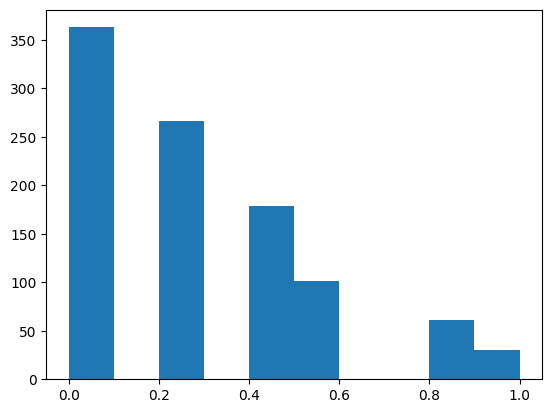

In [60]:
import matplotlib.pyplot as plt

plt.hist(hits)

In [61]:
import numpy as np
np.mean(hits)

0.26420000000000005

In [62]:
len(load_playlists("../../challenge/spotify_million_playlist_dataset_challenge/challenge_set.json"))

10000